# Introduction

This document is intended to describe how to access data from a MySQL database using Python. It utilizes a database of wideband acoustic immitance variables from humans with normal hearing (see https://projectreporter.nih.gov/project_info_description.cfm?aid=8769352&icde=30039221&ddparam=&ddvalue=&ddsub=&cr=10&csb=default&cs=ASC for more details).


## Accessing data from a database using SQL commands

First I will demonstrate how to access data using SQL (structured query language) commands and the `mysql.connector.connect()` function.  We begin by setting up a connection 
to the database.

In [1]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


# A function that can create a connection to a database
def create_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("Connection to MySQL DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection


# connect to Nick's databse at Smith
con = create_connection("scidb.smith.edu", "waiuser", "smith_waiDB", "wai")

print(con)


Connection to MySQL DB successful


## Executing SQL queries

Next a series of SQL queries can be sent to the database. These return lists of tuples which we can convert to a pandas DataFrame using pd.DataFrame(). 



In [2]:

# get a list of tables in the database 
cursor = con.cursor()
cursor.execute("SHOW TABLES")
display(pd.DataFrame(cursor.fetchall(), columns = ["Tables"]))


# get information on these tables 
explain_col_names = ["Field", "Type", "Null", "Key", "Default", "Extra"]  

cursor.execute("EXPLAIN PI_Info")
PI_Info_table_info = pd.DataFrame(cursor.fetchall(), columns = explain_col_names)
display(PI_Info_table_info)

cursor.execute("EXPLAIN Subjects")
Subjects_table_info = pd.DataFrame(cursor.fetchall(), columns = explain_col_names)
display(Subjects_table_info)

cursor.execute("EXPLAIN Measurements")
Measurements_table_info = pd.DataFrame(cursor.fetchall(), columns = explain_col_names)
display(Measurements_table_info)


Tables
0              Codebook
1          Measurements
2  Measurements_pre2020
3               PI_Info
4           PI_Info_OLD
5              Subjects
6      Subjects_pre2020

Field         Type Null  Key Default Extra
0           Identifier  varchar(50)   NO  PRI    None      
1                 Year      int(11)   NO         None      
2              Authors         text   NO         None      
3     AuthorsShortList         text   NO         None      
4                Title         text   NO         None      
5              Journal         text   NO         None      
6                  URL         text   NO         None      
7             Abstract         text   NO         None      
8    DataSubmitterName         text   NO         None      
9   DataSubmitterEmail         text   NO         None      
10       DateSubmitted         text   NO         None      
11            PI_Notes         text   NO         None

Field         Type Null  Key Default Extra
0                       Identifier  varchar(50)   NO  PRI    None      
1                    SubjectNumber      int(11)   NO  PRI    None      
2                     SessionTotal      int(11)   NO         None      
3              AgeFirstMeasurement        float  YES         None      
4      AgeCategoryFirstMeasurement  varchar(50)  YES         None      
5                              Sex  varchar(50)   NO         None      
6                             Race  varchar(50)   NO         None      
7                        Ethnicity  varchar(50)   NO         None      
8    LeftEarStatusFirstMeasurement  varchar(50)   NO         None      
9   RightEarStatusFirstMeasurement  varchar(50)   NO         None      
10                    SubjectNotes         text  YES         None

Field         Type Null  Key Default Extra
0       Identifier  varchar(50)   NO  PRI    None      
1    SubjectNumber      int(11)   NO  PRI    None      
2          Session      int(11)   NO  PRI    None      
3              Ear  varchar(50)   NO  PRI              
4       Instrument  varchar(50)   NO  PRI              
5              Age        float  YES         None      
6      AgeCategory  varchar(50)  YES         None      
7        EarStatus  varchar(50)  YES         None      
8              TPP        float  YES         None      
9        AreaCanal        float  YES         None      
10   PressureCanal        float   NO  PRI       0      
11  SweepDirection  varchar(50)   NO  PRI              
12       Frequency        float   NO  PRI       0      
13      Absorbance        float  YES         None      
14            Zmag        float  YES         None      
15            Zang        float  YES         None

## Let's explore the `PI_Info` table.

In [3]:
cursor.execute("SELECT * from PI_Info")
PI_table = pd.DataFrame(cursor.fetchall())
PI_table.head(3)

0     1                                                  2   \
0    Abur_2014  2014  Defne Abur, Nicholas J. Horton, and Susan E. Voss   
1  Feeney_2017  2017  M. Patrick Feeney,  Douglas H. Keefe, Lisa L. ...   
2   Groon_2015  2015  Katherine A. Groon, Daniel M. Rasetshwane, Jud...   

              3                                                  4   \
0    Abur et al.     Instrasubject variability in power reflectance   
1  Feeney et al.  Normative wideband reflectance, equivalent adm...   
2   Groon et al.  Air-leak effects on ear-canal acoustic absorbance   

                 5                                                  6   \
0  J Am Acad Audiol       https://www.ncbi.nlm.nih.gov/pubmed/25257718   
1          Ear Hear       https://www.ncbi.nlm.nih.gov/pubmed/28045835   
2          Ear Hear  https://journals.lww.com/ear-hearing/fulltext/...   

                                                  7   \
0  "<p> <strong> Background: </strong> Power refl...   
1  "<p> <strong> Objectives: </strong> Wideband a...   
2  "<p> <strong> Objective: </strong> Accurate ea...   

                                    8   \
0                           Susan Voss   
1  M. Patrick Feeney; Douglas H. Keefe   
2                          Steve Neely   

                                                  9        10  \
0                                    svoss@smith.edu  8/24/16   
1  Patrick.Feeney@va.gov; Douglas.Keefe@boystown.org   6/7/18   
2                         Stephen.Neely@boystown.org  6/18/19   

                                                  11  
0  Measurements made on 7 subjects across multipl...  
1  Database includes measurements on 32 subjects,...  
2  Data collected on system described in Rasetshw...

## Let's explore the `Subjects` table.

In [4]:
cursor.execute("SELECT * from Subjects")
subject_table = pd.DataFrame(cursor.fetchall(), columns = Subjects_table_info["Field"])
subject_table.head(3)

Field Identifier  SubjectNumber  SessionTotal  AgeFirstMeasurement  \
0      Abur_2014              1             7                 20.0   
1      Abur_2014              3             8                 19.0   
2      Abur_2014              4             7                 21.0   

Field AgeCategoryFirstMeasurement     Sex     Race Ethnicity  \
0                           Adult  Female  Unknown   Unknown   
1                           Adult  Female  Unknown   Unknown   
2                           Adult  Female  Unknown   Unknown   

Field LeftEarStatusFirstMeasurement RightEarStatusFirstMeasurement  \
0                            Normal                         Normal   
1                            Normal                         Normal   
2                            Normal                         Normal   

Field                                SubjectNotes  
0                                                  
1      Session 5 not included do to acoustic leak  
2

## Let's explore the `Measurements` table.

Probably best to only get a subset of this table because it is very large!



In [5]:
cursor.execute("SELECT * from Measurements")
measurements_table = pd.DataFrame(cursor.fetchall(), columns = Measurements_table_info["Field"])
display(measurements_table.head(3))

measurements_table.shape



Field Identifier  SubjectNumber  Session   Ear Instrument   Age AgeCategory  \
0      Abur_2014              1        1  Left     HearID  20.0       Adult   
1      Abur_2014              1        1  Left     HearID  20.0       Adult   
2      Abur_2014              1        1  Left     HearID  20.0       Adult   

Field EarStatus  TPP  AreaCanal  PressureCanal SweepDirection  Frequency  \
0        Normal -5.0   0.000044            0.0        Ambient    210.938   
1        Normal -5.0   0.000044            0.0        Ambient    234.375   
2        Normal -5.0   0.000044            0.0        Ambient    257.812   

Field  Absorbance         Zmag      Zang  
0        0.033338  113780000.0 -0.233504  
1        0.031571  103585000.0 -0.235778  
2        0.040575   92951700.0 -0.233482

(626945, 16)

## Let's extract data from a given subject


In [6]:
one_subj = measurements_table[(measurements_table.Identifier == "Rosowski_2012") & (measurements_table.SubjectNumber == 3)]

one_subj.head(3)


Field      Identifier  SubjectNumber  Session    Ear Instrument   Age  \
501097  Rosowski_2012              3        1  Left      HearID  30.0   
501098  Rosowski_2012              3        1  Left      HearID  30.0   
501099  Rosowski_2012              3        1  Left      HearID  30.0   

Field  AgeCategory EarStatus  TPP  AreaCanal  PressureCanal SweepDirection  \
501097       Adult    Normal  NaN        NaN            0.0        Ambient   
501098       Adult    Normal  NaN        NaN            0.0        Ambient   
501099       Adult    Normal  NaN        NaN            0.0        Ambient   

Field   Frequency  Absorbance        Zmag      Zang  
501097    210.938    0.085201  76591100.0 -0.220494  
501098    234.375    0.090345  66884300.0 -0.222228  
501099    257.812    0.111527  58816400.0 -0.219561

Finally we can plot the results

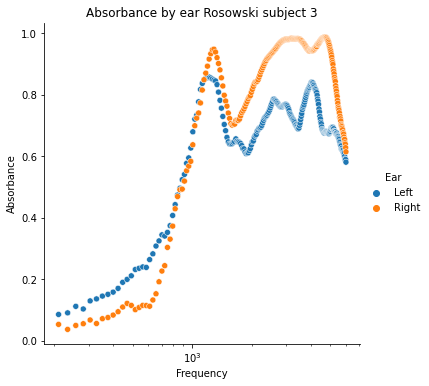

In [133]:
splot = sns.relplot(data = one_subj, x = "Frequency", y = "Absorbance", hue = "Ear");
splot.set(xscale="log");
splot.set(title = "Absorbance by ear Rosowski subject 3");


Close the connection to the database

In [7]:
con.close()